In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


the dataset contains 907 rows and 27 columns

# Expploratory data analysis

In [4]:
list(df.columns)

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

- columns description is given in the problem statement sheet
- primary_fuel and capacity_mw are alternate targets for this problem

In [5]:
# a snapshot of the dataset's structure

In [6]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [7]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# summarizing the variables, showing first look of non-null entries and variable types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

- we have two dta types: float and object
- columns other_fuel2, other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019,  estimated_generation_gwh are filled with null values. They will be removed
- columns country, country_long represent the same information and not useful for the prediction as we know all the records are from India
- url column will be removed as this is not helpful for the prediction


In [10]:
df.drop(['other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019',
        'estimated_generation_gwh'], axis = 1, inplace = True)

In [11]:
df.drop(['country', 'country_long'], axis = 1, inplace = True)

In [12]:
df.drop('url', axis = 1, inplace = True)

In [13]:
# cross-checking data type

In [14]:
df.dtypes

name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [15]:
for i in df.columns:
    print(df[i].value_counts())

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64
19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64
71.6917    4
75.8988    3
71.6918    3
72.8983    3

- missing in other_fuel1 will be filled my mode(Oil), as it seems like people seem to prefare Oil as other_fuel1. removing this column may remove some valuable information for prediction
- column commissioning_year has two issues: firstly, the mode is not really dominant. secondly, even though the mode was dominant, replacing nan by the mode will likely lead to wrong data as nothing can support the assumption that those plants operate during the year mode. sO, this column will be removed.
- Column owner has the same issue with commissioning_year, we will also delete this column.
- column year_of_capacity_data is a constant. it will be removed
- missing values in geolocation_source will be replaced by the mode, as the mode here is very dominant. the assumption is that as the vast majority of plants are goelocated in WRI, the misssing ones are likely to be from WRI
- missing values in the columns generation_gwh_2014-18 will be replaced by the mean. Despite the fact that their mode is 0, removing them will remove important information
- column source will also be removed as it does not bring any important information for the prediction
- for latitude and longitude columns, we cannot replace randomly replace nan by mean or whatever because this will likely lead to non-existing geographical coordinates. if removing nan rows in these columns cause severe data loss, we will remove the two columns
- as the columns name and gppd_idnr are both identifiers of plants, we can remove name and set gppd_idnr as index for mode readability
- generation_data_source is a constant. should be removed


In [16]:
df['other_fuel1'] = df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [17]:
df.drop(['commissioning_year', 'owner', 'year_of_capacity_data','source','generation_data_source','name'], axis = 1, inplace = True)

In [18]:
df.set_index('gppd_idnr', inplace = True)

In [19]:
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())


In [20]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, WRI1020239 to WRI1026761
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          907 non-null    object 
 5   geolocation_source   907 non-null    object 
 6   generation_gwh_2014  907 non-null    float64
 7   generation_gwh_2015  907 non-null    float64
 8   generation_gwh_2016  907 non-null    float64
 9   generation_gwh_2017  907 non-null    float64
 10  generation_gwh_2018  907 non-null    float64
dtypes: float64(8), object(3)
memory usage: 85.0+ KB


In [22]:
# let's convert latitude and longitude into one column representing geographical coordinates

In [23]:
pip install geopandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install shapely



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point



# Create a'geometry' column
df['geometry'] = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]

df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geometry
gppd_idnr,,,,,,,,,,,,
WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (73.2407 28.1839)
WRI1019881,98.0,24.7663,74.6090,Coal,Oil,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (74.609 24.7663)
WRI1026669,39.2,21.9038,69.3732,Wind,Oil,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (69.3732 21.9038)
IND0000001,135.0,23.8712,91.3602,Gas,Oil,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,POINT (91.3602 23.8712)
IND0000002,1800.0,21.9603,82.4091,Coal,Oil,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,POINT (82.4091 21.9603)
...,...,...,...,...,...,...,...,...,...,...,...,...
IND0000513,1600.0,16.2949,77.3568,Coal,Oil,WRI,2431.823590,0.994875,233.596650,865.400000,686.500000,POINT (77.3568 16.2949)
WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Industry About,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (78.1654 12.8932)
WRI1026776,25.5,15.2758,75.5811,Wind,Oil,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (75.5811 15.2758)


In [26]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
geometry                object
dtype: object

In [27]:
df.nunique()

capacity_mw            361
latitude               836
longitude              827
primary_fuel             8
other_fuel1              3
geolocation_source       3
generation_gwh_2014    372
generation_gwh_2015    397
generation_gwh_2016    404
generation_gwh_2017    409
generation_gwh_2018    411
geometry               837
dtype: int64

In [28]:
df.isna().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
other_fuel1             0
geolocation_source      0
generation_gwh_2014     0
generation_gwh_2015     0
generation_gwh_2016     0
generation_gwh_2017     0
generation_gwh_2018     0
geometry                0
dtype: int64

In [29]:
print(df['geometry'].value_counts())

POINT EMPTY                46
POINT (72.8983 19.0004)     3
POINT (81.2875 24.1917)     3
POINT (76.492 31.268)       2
POINT (74.7673 14.2352)     2
                           ..
POINT (86.2491 22.7554)     1
POINT (88.2924 27.1598)     1
POINT (73.212 17.297)       1
POINT (71.2801 20.8772)     1
POINT (77.4768 9.9344)      1
Name: geometry, Length: 837, dtype: int64


In [30]:
df.loc[df['geometry']=='POINT EMPTY',]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geometry
gppd_idnr,,,,,,,,,,,,


to remove nan from geometry, we have to remove nan from latitude or longitude

In [31]:
# locating and removing missing values from column latitude

In [32]:
nan_rows = df[df['latitude'].isna()]

In [33]:
print('data lost in %: ', 100-(df.shape[0]-nan_rows.shape[0])/df.shape[0]*100)

data lost in %:  5.07166482910695


data lost is acceptable

In [34]:
df1= df.dropna()

In [35]:
df1

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geometry
gppd_idnr,,,,,,,,,,,,
WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (73.2407 28.1839)
WRI1019881,98.0,24.7663,74.6090,Coal,Oil,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (74.609 24.7663)
WRI1026669,39.2,21.9038,69.3732,Wind,Oil,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (69.3732 21.9038)
IND0000001,135.0,23.8712,91.3602,Gas,Oil,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,POINT (91.3602 23.8712)
IND0000002,1800.0,21.9603,82.4091,Coal,Oil,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,POINT (82.4091 21.9603)
...,...,...,...,...,...,...,...,...,...,...,...,...
IND0000513,1600.0,16.2949,77.3568,Coal,Oil,WRI,2431.823590,0.994875,233.596650,865.400000,686.500000,POINT (77.3568 16.2949)
WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Industry About,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (78.1654 12.8932)
WRI1026776,25.5,15.2758,75.5811,Wind,Oil,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (75.5811 15.2758)


In [36]:
df1.loc[df.duplicated(),]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geometry
gppd_idnr,,,,,,,,,,,,


no duplicate

In [37]:
# summary statistics of df1 and quick check of outliers

In [38]:
df1.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,340.382051,21.197918,77.464907,2447.873244,2448.582212,2490.031658,2576.521363,2630.157225
std,601.830519,6.239612,4.939316,2728.827332,2926.796630,2945.039372,2987.234820,3099.230838
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,16.773900,74.256200,1153.421000,843.747000,823.297501,858.734750,798.381000
50%,60.000000,21.780000,76.719500,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,412.020000,25.512400,79.440800,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


all the numerical columns seem to contain outliers

In [39]:
# checking outliers with boxplot

In [40]:
def box(columns, data, a, b, c, d):
    plt.figure(figsize = (10, 8), facecolor = 'purple')
    j = 1
    for i in columns:
        if j<=a:
            ax = plt.subplot(b, c, j)
            sns.boxplot(data[i], palette = 'colorblind')
            plt.xlabel(i, fontsize = d)
        j+=1
        
        plt.tight_layout()

In [41]:
col = []
for i in df1.columns:
    if df1[i].dtypes in ['float', 'int']:
        col.append(i)

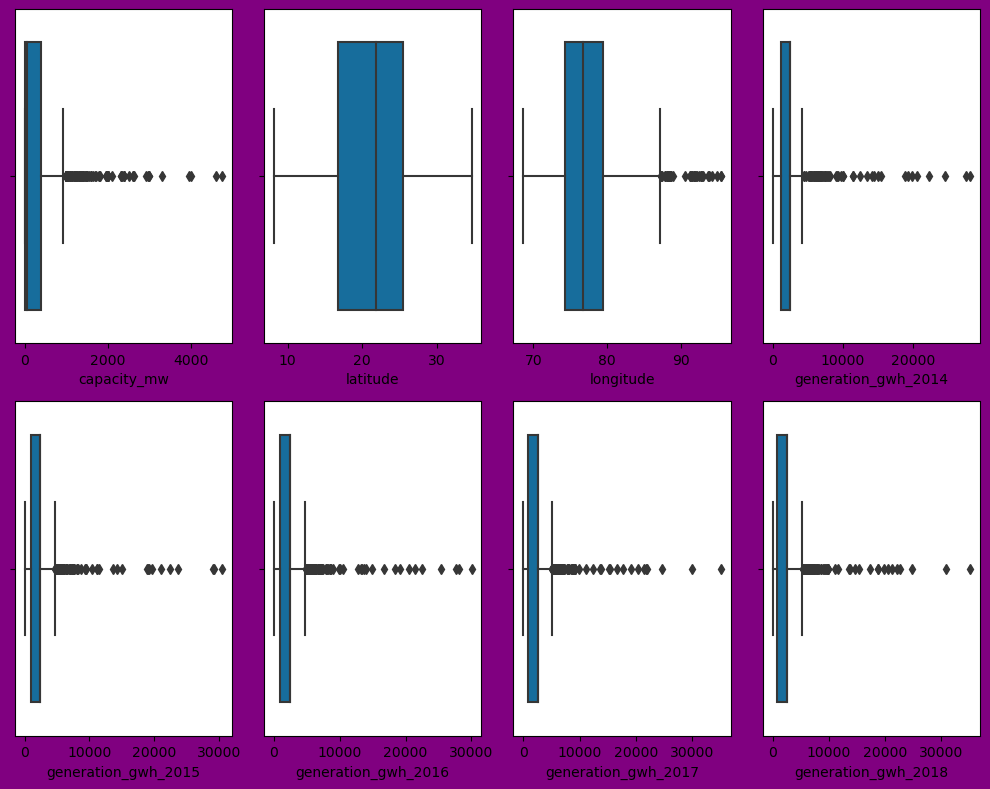

In [42]:
box(col, df,len(col), 2, 4, 10)

In [43]:
df1.skew()

capacity_mw            3.037191
latitude              -0.145866
longitude              1.112646
generation_gwh_2014    4.930254
generation_gwh_2015    5.253370
generation_gwh_2016    4.965294
generation_gwh_2017    5.014455
generation_gwh_2018    4.843057
dtype: float64

In [44]:
# removing outliers

In [45]:
# zscore method

from scipy.stats import zscore

feat = df1[col]

# Calculating z-scores using scipy.stats.zscore
z_scores = zscore(feat)

# Converting the result to a DataFrame
z_score = pd.DataFrame(z_scores, columns=feat.columns)
z = z_score.abs()

# Displaying the DataFrame with z-scores
print(z)

            capacity_mw  latitude  longitude  generation_gwh_2014  \
gppd_idnr                                                           
WRI1020239     0.561750  1.120269   0.855718             0.005885   
WRI1019881     0.402975  0.572224   0.578535             0.005885   
WRI1026669     0.500734  0.113195   1.639177             0.005885   
IND0000001     0.341461  0.428686   2.814837             0.671038   
IND0000002     2.426707  0.122255   1.001569             0.215484   
...                 ...       ...        ...                  ...   
IND0000513     2.094194  0.786246   0.021900             0.005885   
WRI1026222     0.560919  1.331741   0.141902             0.005885   
WRI1026776     0.523511  0.949668   0.381612             0.005885   
WRI1019901     0.432902  0.505466   0.753013             0.005885   
WRI1026761     0.538474  1.806212   0.002409             0.005885   

            generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
gppd_idnr                

In [46]:
x = df1[(z<3).all(axis = 1)]

print('data lost in %: ', (df1.shape[0]-x.shape[0])/df1.shape[0]*100)

data lost in %:  4.181184668989547


In [47]:
# using IQR method


Q1 = feat.quantile(0.25)

Q3 = feat.quantile(0.75)

IQR = Q3-Q1

n = Q1-1.5*IQR
m = Q3+1.5*IQR

In [48]:
y = df1[~((df1 > m) | (df1 < n)).any(axis =1)]

print('data lost in %: ', (df1.shape[0]-y.shape[0])/df1.shape[0]*100)

data lost in %:  18.931475029036005


Data loss with z-score is acceptable 

In [49]:
df1 = x

In [50]:
df1

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geometry
gppd_idnr,,,,,,,,,,,,
WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (73.2407 28.1839)
WRI1019881,98.0,24.7663,74.6090,Coal,Oil,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (74.609 24.7663)
WRI1026669,39.2,21.9038,69.3732,Wind,Oil,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (69.3732 21.9038)
IND0000001,135.0,23.8712,91.3602,Gas,Oil,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,POINT (91.3602 23.8712)
IND0000002,1800.0,21.9603,82.4091,Coal,Oil,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,POINT (82.4091 21.9603)
...,...,...,...,...,...,...,...,...,...,...,...,...
IND0000513,1600.0,16.2949,77.3568,Coal,Oil,WRI,2431.823590,0.994875,233.596650,865.400000,686.500000,POINT (77.3568 16.2949)
WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Industry About,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (78.1654 12.8932)
WRI1026776,25.5,15.2758,75.5811,Wind,Oil,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (75.5811 15.2758)


In [51]:
df1.skew()

capacity_mw            1.945004
latitude              -0.108047
longitude              0.967396
generation_gwh_2014    1.515514
generation_gwh_2015    1.389486
generation_gwh_2016    1.410976
generation_gwh_2017    1.280814
generation_gwh_2018    1.319552
dtype: float64

skewness reduced

# first prediction: primary_fuel

In [52]:
df11=df1

In [53]:
df11.skew()

capacity_mw            1.945004
latitude              -0.108047
longitude              0.967396
generation_gwh_2014    1.515514
generation_gwh_2015    1.389486
generation_gwh_2016    1.410976
generation_gwh_2017    1.280814
generation_gwh_2018    1.319552
dtype: float64

In [54]:
# removing skewness

In [55]:
from scipy.stats import yeojohnson

# Select the column(s) to remove skewness
columns_to_transform = ['capacity_mw', 'generation_gwh_2014', 'generation_gwh_2015', 'longitude',
                        'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

# Apply Yeo-Johnson transformation to selected columns
df11[columns_to_transform] = df11[columns_to_transform].apply(lambda a: yeojohnson(a + abs(a.min()) + 1)[0])


In [56]:
df11.skew()

capacity_mw            0.029061
latitude              -0.108047
longitude              0.000000
generation_gwh_2014   -0.210280
generation_gwh_2015   -0.269817
generation_gwh_2016   -0.273121
generation_gwh_2017   -0.296646
generation_gwh_2018   -0.302788
dtype: float64

In [57]:
# visualising distribution

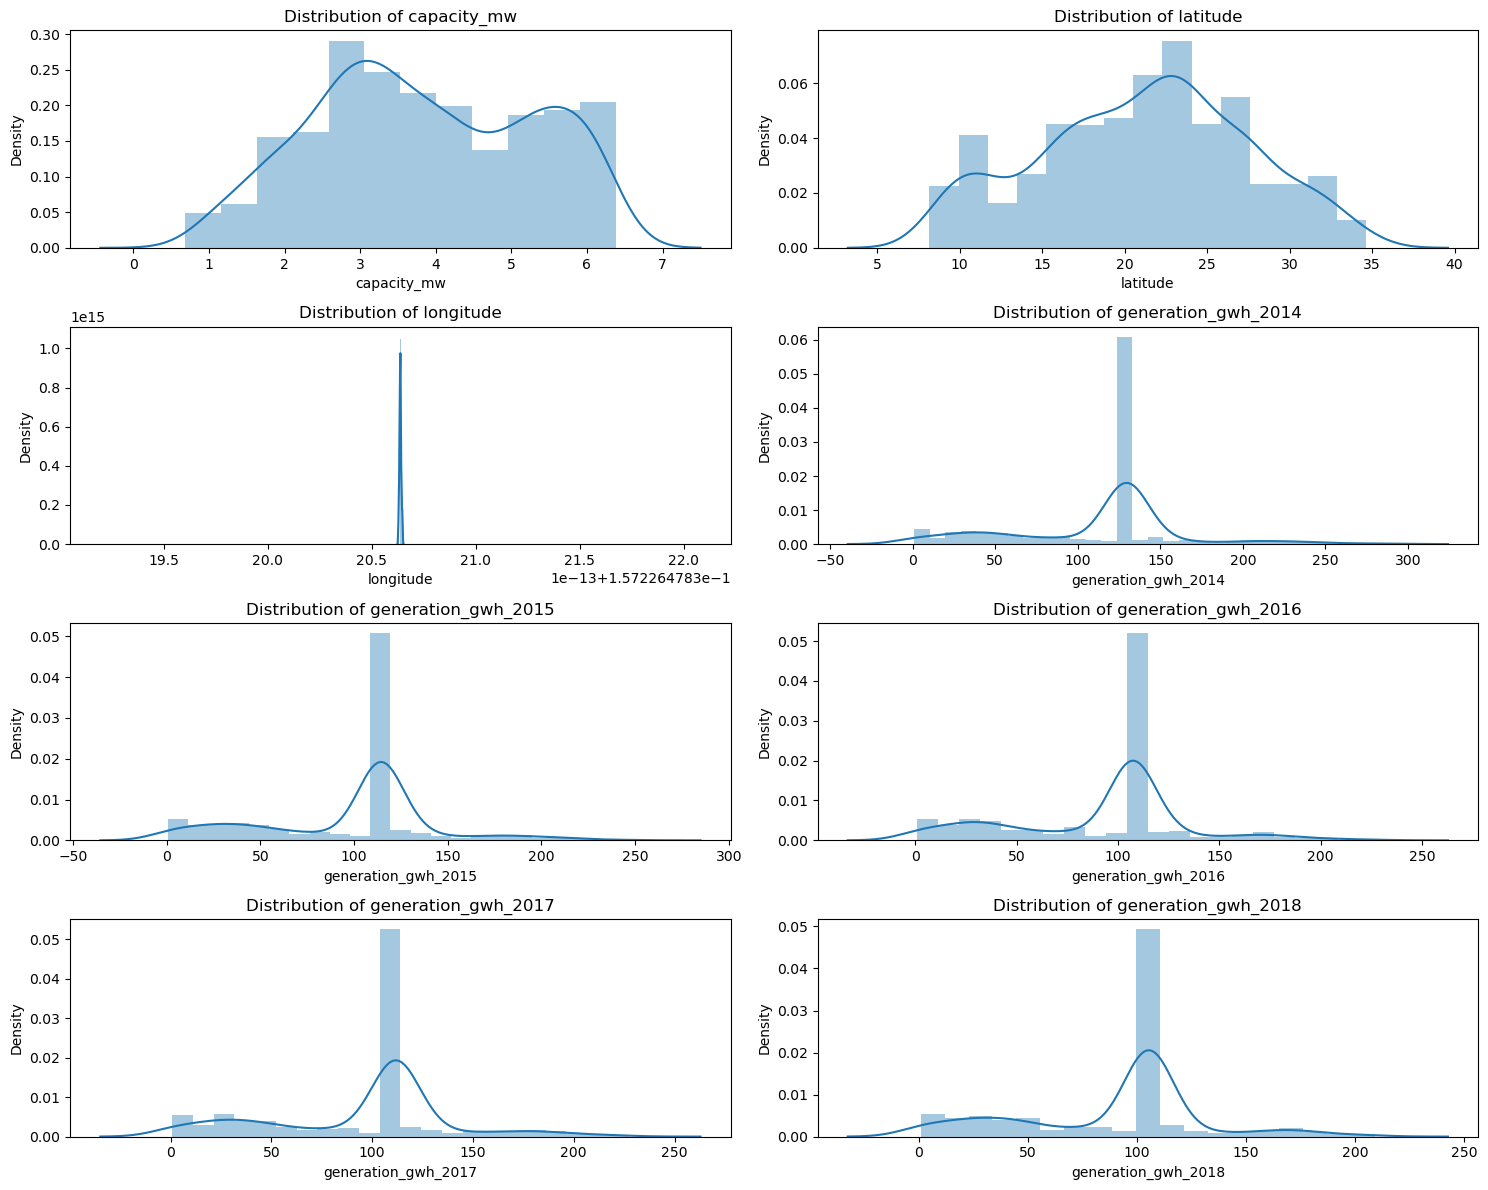

In [58]:
numeric_columns = df11.select_dtypes(include=['number']).columns

# Calculating the number of rows and columns for subplots
num_columns = len(numeric_columns)
num_rows = (num_columns // 2) + (num_columns % 2)

# Creating subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 3 * num_rows))
axes = axes.flatten()

# Plotting distributions for each numeric column using a for loop
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    sns.distplot(df11[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)

# Adjusting layout for better spacing
plt.tight_layout()
plt.show()

In [59]:
# encoding categorical columns

In [60]:
df11['geometry'] = df11['geometry'].astype('object')

In [61]:
df11['geometry'].nunique()

801

In [62]:
# we drop geometrty as it cannot be encoded into numeric, and keep latitude and longitude

df11.drop('geometry', axis = 1, inplace = True)

In [63]:
df11

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
gppd_idnr,,,,,,,,,,,
WRI1020239,1.451776,28.1839,0.157226,Solar,Oil,National Renewable Energy Laboratory,129.398720,114.250673,107.263001,111.635633,105.307298
WRI1019881,4.137740,24.7663,0.157226,Coal,Oil,WRI,129.398720,114.250673,107.263001,111.635633,105.307298
WRI1026669,3.409532,21.9038,0.157226,Wind,Oil,WRI,129.398720,114.250673,107.263001,111.635633,105.307298
IND0000001,4.389005,23.8712,0.157226,Gas,Oil,WRI,60.151833,64.627021,62.470122,54.571306,50.102622
IND0000002,6.310690,21.9603,0.157226,Coal,Oil,WRI,146.354802,183.930125,174.314054,165.627644,179.030567
...,...,...,...,...,...,...,...,...,...,...,...
IND0000513,6.227964,16.2949,0.157226,Coal,Oil,WRI,129.398720,1.485888,30.536614,62.901926,52.585210
WRI1026222,1.549651,12.8932,0.157226,Solar,Oil,Industry About,129.398720,114.250673,107.263001,111.635633,105.307298
WRI1026776,3.067267,15.2758,0.157226,Wind,Oil,WRI,129.398720,114.250673,107.263001,111.635633,105.307298


In [64]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

for column in df11:
    if df11[column].dtypes == 'object':  
        df11[column] = encoder.fit_transform(df11[column].values.reshape(-1,1))


df11

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
gppd_idnr,,,,,,,,,,,
WRI1020239,1.451776,28.1839,0.157226,6.0,2.0,1.0,129.398720,114.250673,107.263001,111.635633,105.307298
WRI1019881,4.137740,24.7663,0.157226,1.0,2.0,2.0,129.398720,114.250673,107.263001,111.635633,105.307298
WRI1026669,3.409532,21.9038,0.157226,7.0,2.0,2.0,129.398720,114.250673,107.263001,111.635633,105.307298
IND0000001,4.389005,23.8712,0.157226,2.0,2.0,2.0,60.151833,64.627021,62.470122,54.571306,50.102622
IND0000002,6.310690,21.9603,0.157226,1.0,2.0,2.0,146.354802,183.930125,174.314054,165.627644,179.030567
...,...,...,...,...,...,...,...,...,...,...,...
IND0000513,6.227964,16.2949,0.157226,1.0,2.0,2.0,129.398720,1.485888,30.536614,62.901926,52.585210
WRI1026222,1.549651,12.8932,0.157226,6.0,2.0,0.0,129.398720,114.250673,107.263001,111.635633,105.307298
WRI1026776,3.067267,15.2758,0.157226,7.0,2.0,2.0,129.398720,114.250673,107.263001,111.635633,105.307298


In [65]:
# correlation

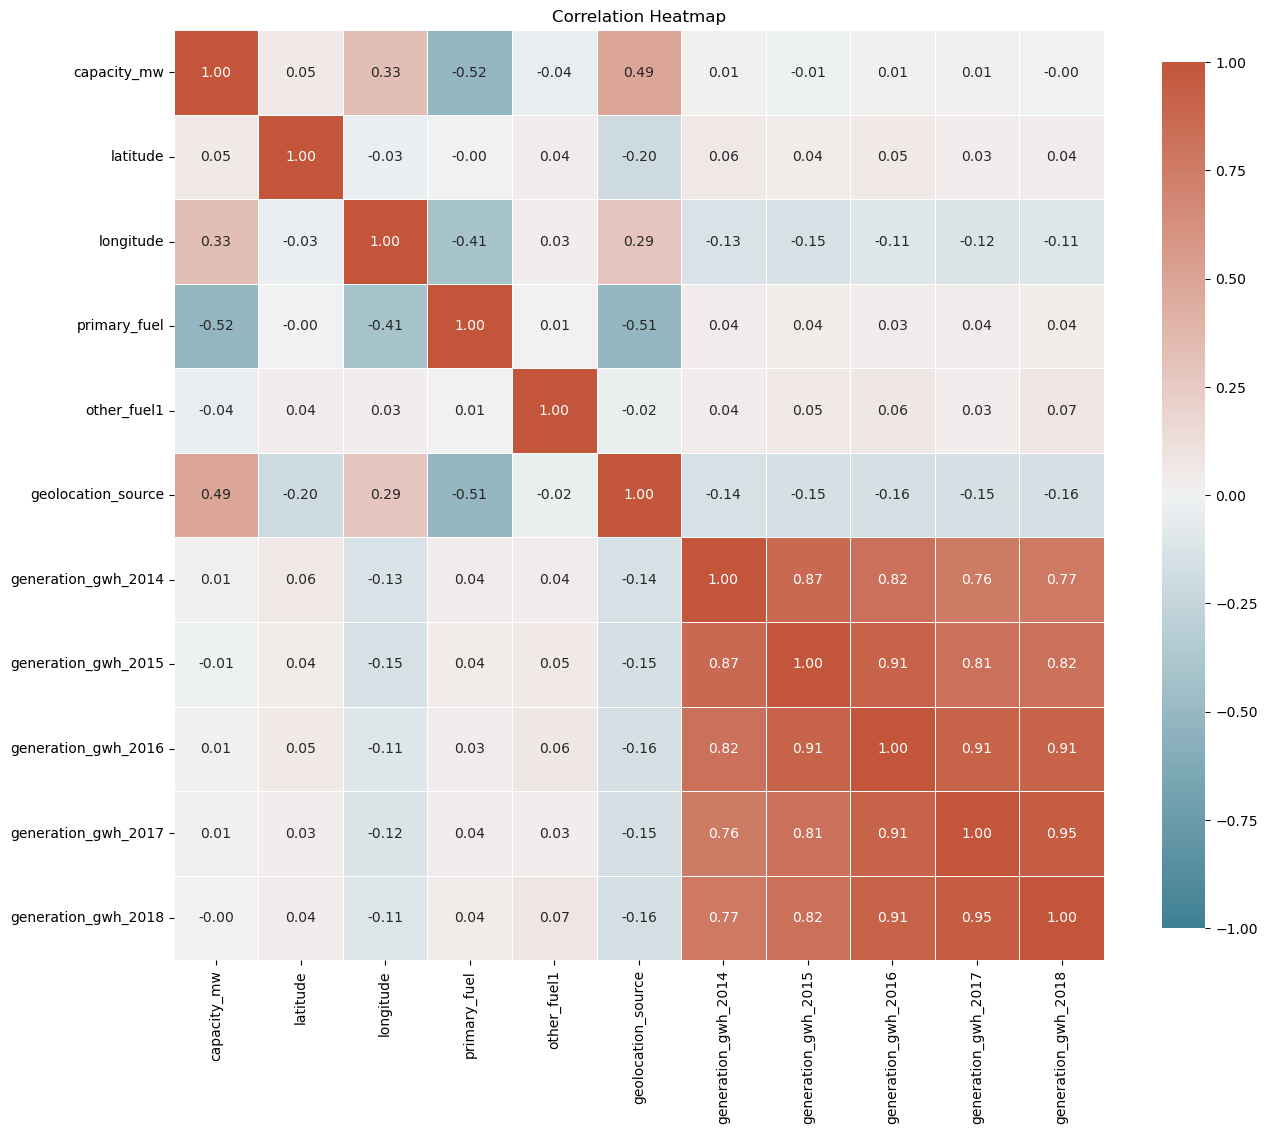

In [66]:
corr_matrix = df11.corr()
plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title("Correlation Heatmap")
plt.show()

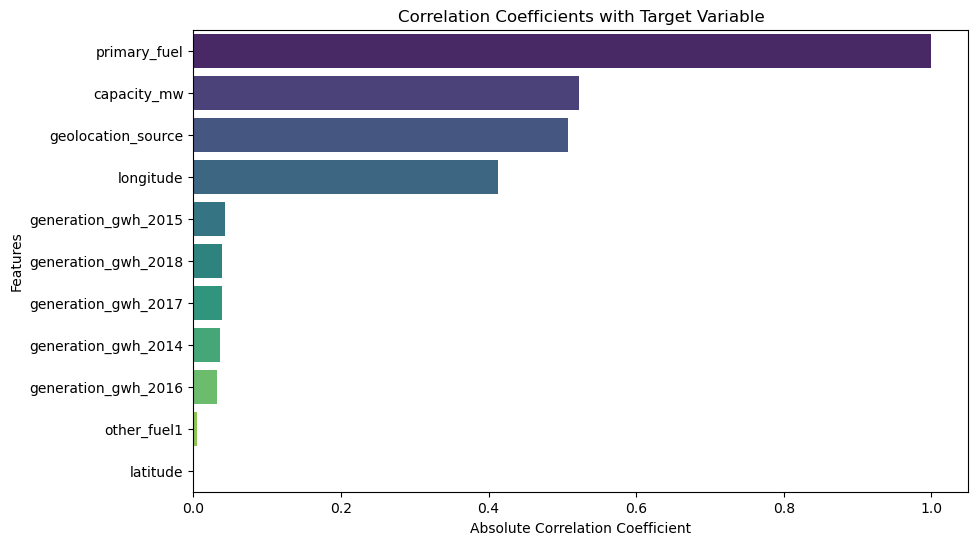

In [67]:
 # Calculating the correlation matrix
corr_matrix = df11.corr()

# Extracting correlations with the target variable
corr_with_target = corr_matrix['primary_fuel'].abs()

# Sorting the correlations in descending order
sorted_corr = corr_with_target.sort_values(ascending=False)

# Creating a bar plot to visualize the sorted correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette="viridis")
plt.title("Correlation Coefficients with Target Variable")
plt.xlabel("Absolute Correlation Coefficient")
plt.ylabel("Features")
plt.show()

generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 are correlated to each other. they almost all have the same correlation level with the target. 

we will represent the 4 columns by a single column name 'generation_gwh', with values being the average of the 4 columns

In [68]:
df11['generation_gwh'] = (df11.generation_gwh_2014+df11.generation_gwh_2015+df11.generation_gwh_2016+df11.generation_gwh_2017+
                         df11.generation_gwh_2018)/5

In [69]:
df11

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh
gppd_idnr,,,,,,,,,,,,
WRI1020239,1.451776,28.1839,0.157226,6.0,2.0,1.0,129.398720,114.250673,107.263001,111.635633,105.307298,113.571065
WRI1019881,4.137740,24.7663,0.157226,1.0,2.0,2.0,129.398720,114.250673,107.263001,111.635633,105.307298,113.571065
WRI1026669,3.409532,21.9038,0.157226,7.0,2.0,2.0,129.398720,114.250673,107.263001,111.635633,105.307298,113.571065
IND0000001,4.389005,23.8712,0.157226,2.0,2.0,2.0,60.151833,64.627021,62.470122,54.571306,50.102622,58.384581
IND0000002,6.310690,21.9603,0.157226,1.0,2.0,2.0,146.354802,183.930125,174.314054,165.627644,179.030567,169.851438
...,...,...,...,...,...,...,...,...,...,...,...,...
IND0000513,6.227964,16.2949,0.157226,1.0,2.0,2.0,129.398720,1.485888,30.536614,62.901926,52.585210,55.381672
WRI1026222,1.549651,12.8932,0.157226,6.0,2.0,0.0,129.398720,114.250673,107.263001,111.635633,105.307298,113.571065
WRI1026776,3.067267,15.2758,0.157226,7.0,2.0,2.0,129.398720,114.250673,107.263001,111.635633,105.307298,113.571065


In [70]:
df11.drop(['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',
           'generation_gwh_2018'], axis = 1, inplace = True)

In [71]:
df11

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh
gppd_idnr,,,,,,,
WRI1020239,1.451776,28.1839,0.157226,6.0,2.0,1.0,113.571065
WRI1019881,4.137740,24.7663,0.157226,1.0,2.0,2.0,113.571065
WRI1026669,3.409532,21.9038,0.157226,7.0,2.0,2.0,113.571065
IND0000001,4.389005,23.8712,0.157226,2.0,2.0,2.0,58.384581
IND0000002,6.310690,21.9603,0.157226,1.0,2.0,2.0,169.851438
...,...,...,...,...,...,...,...
IND0000513,6.227964,16.2949,0.157226,1.0,2.0,2.0,55.381672
WRI1026222,1.549651,12.8932,0.157226,6.0,2.0,0.0,113.571065
WRI1026776,3.067267,15.2758,0.157226,7.0,2.0,2.0,113.571065


latitude is not correlated with the target. we should drop it.

In [72]:
df11.drop('latitude', axis = 1, inplace = True)

In [73]:
df11

,capacity_mw,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh
gppd_idnr,,,,,,
WRI1020239,1.451776,0.157226,6.0,2.0,1.0,113.571065
WRI1019881,4.137740,0.157226,1.0,2.0,2.0,113.571065
WRI1026669,3.409532,0.157226,7.0,2.0,2.0,113.571065
IND0000001,4.389005,0.157226,2.0,2.0,2.0,58.384581
IND0000002,6.310690,0.157226,1.0,2.0,2.0,169.851438
...,...,...,...,...,...,...
IND0000513,6.227964,0.157226,1.0,2.0,2.0,55.381672
WRI1026222,1.549651,0.157226,6.0,2.0,0.0,113.571065
WRI1026776,3.067267,0.157226,7.0,2.0,2.0,113.571065


In [74]:
# separating features and target

x = df11.drop('primary_fuel', axis = 1)
y = df11['primary_fuel']

In [75]:
# target balanceness

y.value_counts()

1.0    230
3.0    225
6.0    122
7.0    108
2.0     64
0.0     50
5.0     17
4.0      9
Name: primary_fuel, dtype: int64

target variable is not balanced

In [76]:
# balancing the tartget's classes 

In [77]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X, Y= ros.fit_resample(x, y)

In [78]:
Y.value_counts()

6.0    230
1.0    230
7.0    230
2.0    230
3.0    230
0.0    230
5.0    230
4.0    230
Name: primary_fuel, dtype: int64

In [79]:
x=X
y=Y

In [80]:
# standardizing the scales and VIF computation

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


# Standardizing the variables
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Calculating VIF for each standardized variable
vif = pd.DataFrame()
vif["Variable"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Displaying the DataFrame with VIF values for standardized variables
print(vif)

             Variable       VIF
0         capacity_mw  1.292127
1           longitude  1.139753
2         other_fuel1  1.046630
3  geolocation_source  1.306688
4      generation_gwh  1.062621


# Modelling

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
import joblib
import pickle

In [83]:
# best random state

In [84]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Defining classifier
clf = RandomForestClassifier()

# Defining parameters for grid search
param_grid = {'random_state': range(1, 101)}

# Performing grid search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Getting the best random state
best_random_state = grid_search.best_params_['random_state']
print(f"Best Random State: {best_random_state}")

Best Random State: 6


In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=6)

In [86]:
# training the data on each algorithm and CV

L = LogisticRegression()
R = RandomForestClassifier()
E = ExtraTreesClassifier()
G = GradientBoostingClassifier()
A = AdaBoostClassifier()
B = BaggingClassifier()
S = SVC()

Mod = [L,R,E,G,A,B,S]

for model in Mod:
    model.fit(x_train,y_train)
    pred_model = model.predict(x_test)
    acc = accuracy_score(y_test, pred_model)
    pred_train = model.predict(x_train)
    print('accuracy_score on training data: ', accuracy_score(y_train, pred_train))
    score = cross_val_score(model,x,y)
    print('accuracy: ', acc)
    print(confusion_matrix(y_test, pred_model))
    print(classification_report(y_test, pred_model))
    print(score)
    print(score.mean())
    print('The difference between accuracy score and cross validation score of ', model, 'is: ', accuracy_score(y_test, pred_model) - score.mean())
    print('\n')

accuracy_score on training data:  0.4260869565217391
accuracy:  0.41304347826086957
[[16  0  0  0  0  0  0 39]
 [ 2  5  9  0 28  0  0  8]
 [ 0  5 27  5 11  1  0  3]
 [11  0 24  8  3  7  0  6]
 [ 0 10 27  0 29  0  0  0]
 [ 0  9 21  4  0  7  0 20]
 [ 0  0  0  0  0  0 64  0]
 [ 9  8  0  0  0  0  0 34]]
              precision    recall  f1-score   support

         0.0       0.42      0.29      0.34        55
         1.0       0.14      0.10      0.11        52
         2.0       0.25      0.52      0.34        52
         3.0       0.47      0.14      0.21        59
         4.0       0.41      0.44      0.42        66
         5.0       0.47      0.11      0.18        61
         6.0       1.00      1.00      1.00        64
         7.0       0.31      0.67      0.42        51

    accuracy                           0.41       460
   macro avg       0.43      0.41      0.38       460
weighted avg       0.45      0.41      0.39       460

[0.47554348 0.44021739 0.47826087 0.45923913 0.4

- LogisticRegression(), AdaBoostClassifier() and   SVC() are not good model for this problem, because the don't perform well on training data.
- ExtraTreesClassifier() has the best training score, but occupies third position in terms of the difference between cross-val-score and test-score
- BaggingClassifier() has the least difference between cross-val-score and test-score and almost the same training score as ExtraTreesClassifier().

- based on the above, we select BaggingClassifier() as our best model.


In [87]:
# hyperperameter tuning 

from sklearn.model_selection import GridSearchCV

param_grid = {'max_features':[1,2,3],
             'random_state':[20,100,500],
             'bootstrap':[True,False],
             'n_jobs':[-1,0,1],
             'n_estimators':[20,50,100,150]}

In [88]:
SearchCV = GridSearchCV(BaggingClassifier(), param_grid = param_grid, cv = 5)
SearchCV.fit(x_train, y_train)
print('best estimator: ', SearchCV.best_estimator_)

best estimator:  BaggingClassifier(max_features=3, n_estimators=100, n_jobs=-1, random_state=20)


In [89]:
my_model = BaggingClassifier(max_features=3, n_estimators=100, n_jobs=-1, random_state=20)
my_model.fit(x_train, y_train)
pred = my_model.predict(x_test)
print('Acuuracy Score=', (accuracy_score(y_test, pred))*100) 


Acuuracy Score= 85.43478260869564


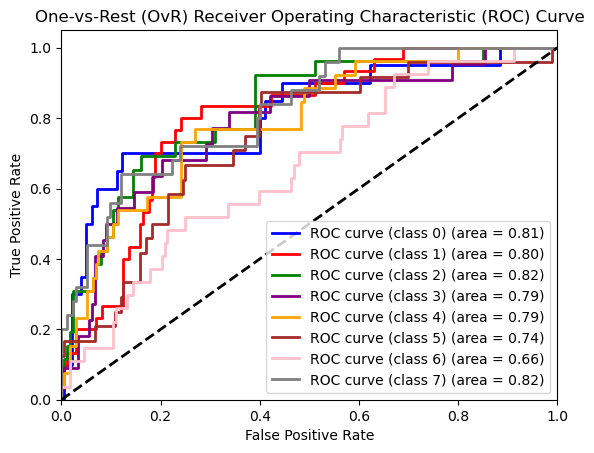

In [90]:
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Generate a multiclass dataset with 8 classes
x, y = make_classification(n_samples=1000, n_features=20, n_classes=8, n_informative=10, random_state=42)

# Binarize the labels
y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y_bin, test_size=0.2, random_state=42)

# Define base classifier
base_classifier = LogisticRegression()

# Create a BaggingClassifier with OneVsRestClassifier
classifier = BaggingClassifier(base_classifier, n_estimators=10)
ovr_classifier = OneVsRestClassifier(classifier)

# Fit the classifier
y_score = ovr_classifier.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_test[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray'])
for i, color in zip(range(len(y_test[0])), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest (OvR) Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [91]:
pickle.dump(my_model, open('cl_power_Romuald.pkl', 'wb'))

# second prediction: capacity_mw 

In [92]:
df2= df.dropna()

In [93]:
df2

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geometry
gppd_idnr,,,,,,,,,,,,
WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (73.2407 28.1839)
WRI1019881,98.0,24.7663,74.6090,Coal,Oil,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (74.609 24.7663)
WRI1026669,39.2,21.9038,69.3732,Wind,Oil,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (69.3732 21.9038)
IND0000001,135.0,23.8712,91.3602,Gas,Oil,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,POINT (91.3602 23.8712)
IND0000002,1800.0,21.9603,82.4091,Coal,Oil,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,POINT (82.4091 21.9603)
...,...,...,...,...,...,...,...,...,...,...,...,...
IND0000513,1600.0,16.2949,77.3568,Coal,Oil,WRI,2431.823590,0.994875,233.596650,865.400000,686.500000,POINT (77.3568 16.2949)
WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Industry About,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (78.1654 12.8932)
WRI1026776,25.5,15.2758,75.5811,Wind,Oil,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,POINT (75.5811 15.2758)


In [94]:
df2.skew()

capacity_mw            3.037191
latitude              -0.145866
longitude              1.112646
generation_gwh_2014    4.930254
generation_gwh_2015    5.253370
generation_gwh_2016    4.965294
generation_gwh_2017    5.014455
generation_gwh_2018    4.843057
dtype: float64

In [95]:
# zscore method

from scipy.stats import zscore

feat = df2[col]

# Calculating z-scores using scipy.stats.zscore
z_scores = zscore(feat)

# Converting the result to a DataFrame
z_score = pd.DataFrame(z_scores, columns=feat.columns)
z = z_score.abs()

# Displaying the DataFrame with z-scores
print(z)

            capacity_mw  latitude  longitude  generation_gwh_2014  \
gppd_idnr                                                           
WRI1020239     0.561750  1.120269   0.855718             0.005885   
WRI1019881     0.402975  0.572224   0.578535             0.005885   
WRI1026669     0.500734  0.113195   1.639177             0.005885   
IND0000001     0.341461  0.428686   2.814837             0.671038   
IND0000002     2.426707  0.122255   1.001569             0.215484   
...                 ...       ...        ...                  ...   
IND0000513     2.094194  0.786246   0.021900             0.005885   
WRI1026222     0.560919  1.331741   0.141902             0.005885   
WRI1026776     0.523511  0.949668   0.381612             0.005885   
WRI1019901     0.432902  0.505466   0.753013             0.005885   
WRI1026761     0.538474  1.806212   0.002409             0.005885   

            generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
gppd_idnr                

In [96]:
t = df2[(z<3).all(axis = 1)]

print('data lost in %: ', (df2.shape[0]-t.shape[0])/df2.shape[0]*100)

data lost in %:  4.181184668989547


In [97]:
df2.skew()

capacity_mw            3.037191
latitude              -0.145866
longitude              1.112646
generation_gwh_2014    4.930254
generation_gwh_2015    5.253370
generation_gwh_2016    4.965294
generation_gwh_2017    5.014455
generation_gwh_2018    4.843057
dtype: float64

In [98]:
# removing skewness

In [99]:
from scipy.stats import yeojohnson

# Select the column(s) to remove skewness
columns_to_transform = ['generation_gwh_2014', 'generation_gwh_2015', 'longitude',
                        'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

# Apply Yeo-Johnson transformation to selected columns
df2[columns_to_transform] = df2[columns_to_transform].apply(lambda a: yeojohnson(a + abs(a.min()) + 1)[0])


In [100]:
df2.skew()

capacity_mw            3.037191
latitude              -0.145866
longitude              0.000000
generation_gwh_2014    0.127668
generation_gwh_2015    0.081977
generation_gwh_2016    0.050794
generation_gwh_2017    0.037032
generation_gwh_2018    0.022048
dtype: float64

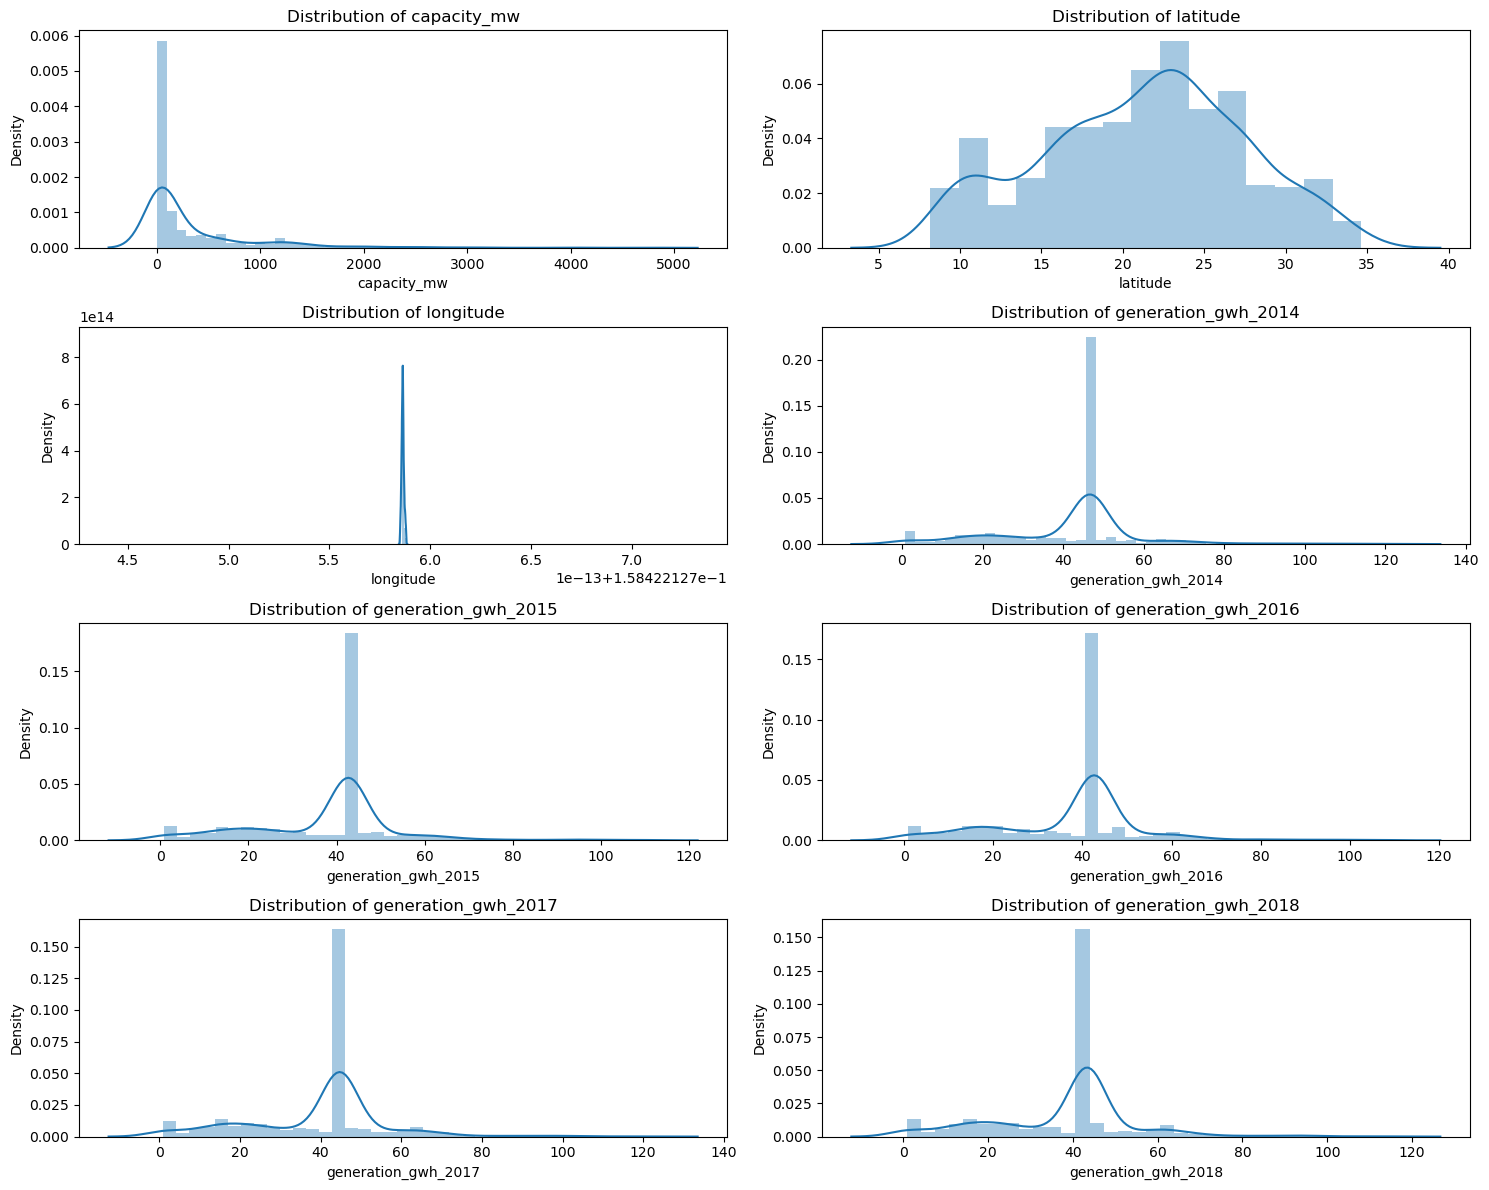

In [101]:
numeric_columns = df2.select_dtypes(include=['number']).columns

# Calculating the number of rows and columns for subplots
num_columns = len(numeric_columns)
num_rows = (num_columns // 2) + (num_columns % 2)

# Creating subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 3 * num_rows))
axes = axes.flatten()

# Plotting distributions for each numeric column using a for loop
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    sns.distplot(df2[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)

# Adjusting layout for better spacing
plt.tight_layout()
plt.show()

In [102]:
# we drop geometrty as it cannot be encoded into numeric, and keep latitude and longitude

df2.drop('geometry', axis = 1, inplace = True)

In [103]:
df2

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
gppd_idnr,,,,,,,,,,,
WRI1020239,2.5,28.1839,0.158422,Solar,Oil,National Renewable Energy Laboratory,46.597487,42.600161,42.570985,44.693807,43.319373
WRI1019881,98.0,24.7663,0.158422,Coal,Oil,WRI,46.597487,42.600161,42.570985,44.693807,43.319373
WRI1026669,39.2,21.9038,0.158422,Wind,Oil,WRI,46.597487,42.600161,42.570985,44.693807,43.319373
IND0000001,135.0,23.8712,0.158422,Gas,Oil,WRI,26.883447,28.331576,28.712677,26.394856,25.008848
IND0000002,1800.0,21.9603,0.158422,Coal,Oil,WRI,50.849811,59.607027,60.339877,59.489874,63.706282
...,...,...,...,...,...,...,...,...,...,...,...
IND0000513,1600.0,16.2949,0.158422,Coal,Oil,WRI,46.597487,1.343052,16.840349,29.331503,25.930372
WRI1026222,3.0,12.8932,0.158422,Solar,Oil,Industry About,46.597487,42.600161,42.570985,44.693807,43.319373
WRI1026776,25.5,15.2758,0.158422,Wind,Oil,WRI,46.597487,42.600161,42.570985,44.693807,43.319373


In [104]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

for column in df2:
    if df2[column].dtypes == 'object':  
        df2[column] = encoder.fit_transform(df2[column].values.reshape(-1,1))


df2

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
gppd_idnr,,,,,,,,,,,
WRI1020239,2.5,28.1839,0.158422,6.0,2.0,1.0,46.597487,42.600161,42.570985,44.693807,43.319373
WRI1019881,98.0,24.7663,0.158422,1.0,2.0,2.0,46.597487,42.600161,42.570985,44.693807,43.319373
WRI1026669,39.2,21.9038,0.158422,7.0,2.0,2.0,46.597487,42.600161,42.570985,44.693807,43.319373
IND0000001,135.0,23.8712,0.158422,2.0,2.0,2.0,26.883447,28.331576,28.712677,26.394856,25.008848
IND0000002,1800.0,21.9603,0.158422,1.0,2.0,2.0,50.849811,59.607027,60.339877,59.489874,63.706282
...,...,...,...,...,...,...,...,...,...,...,...
IND0000513,1600.0,16.2949,0.158422,1.0,2.0,2.0,46.597487,1.343052,16.840349,29.331503,25.930372
WRI1026222,3.0,12.8932,0.158422,6.0,2.0,0.0,46.597487,42.600161,42.570985,44.693807,43.319373
WRI1026776,25.5,15.2758,0.158422,7.0,2.0,2.0,46.597487,42.600161,42.570985,44.693807,43.319373


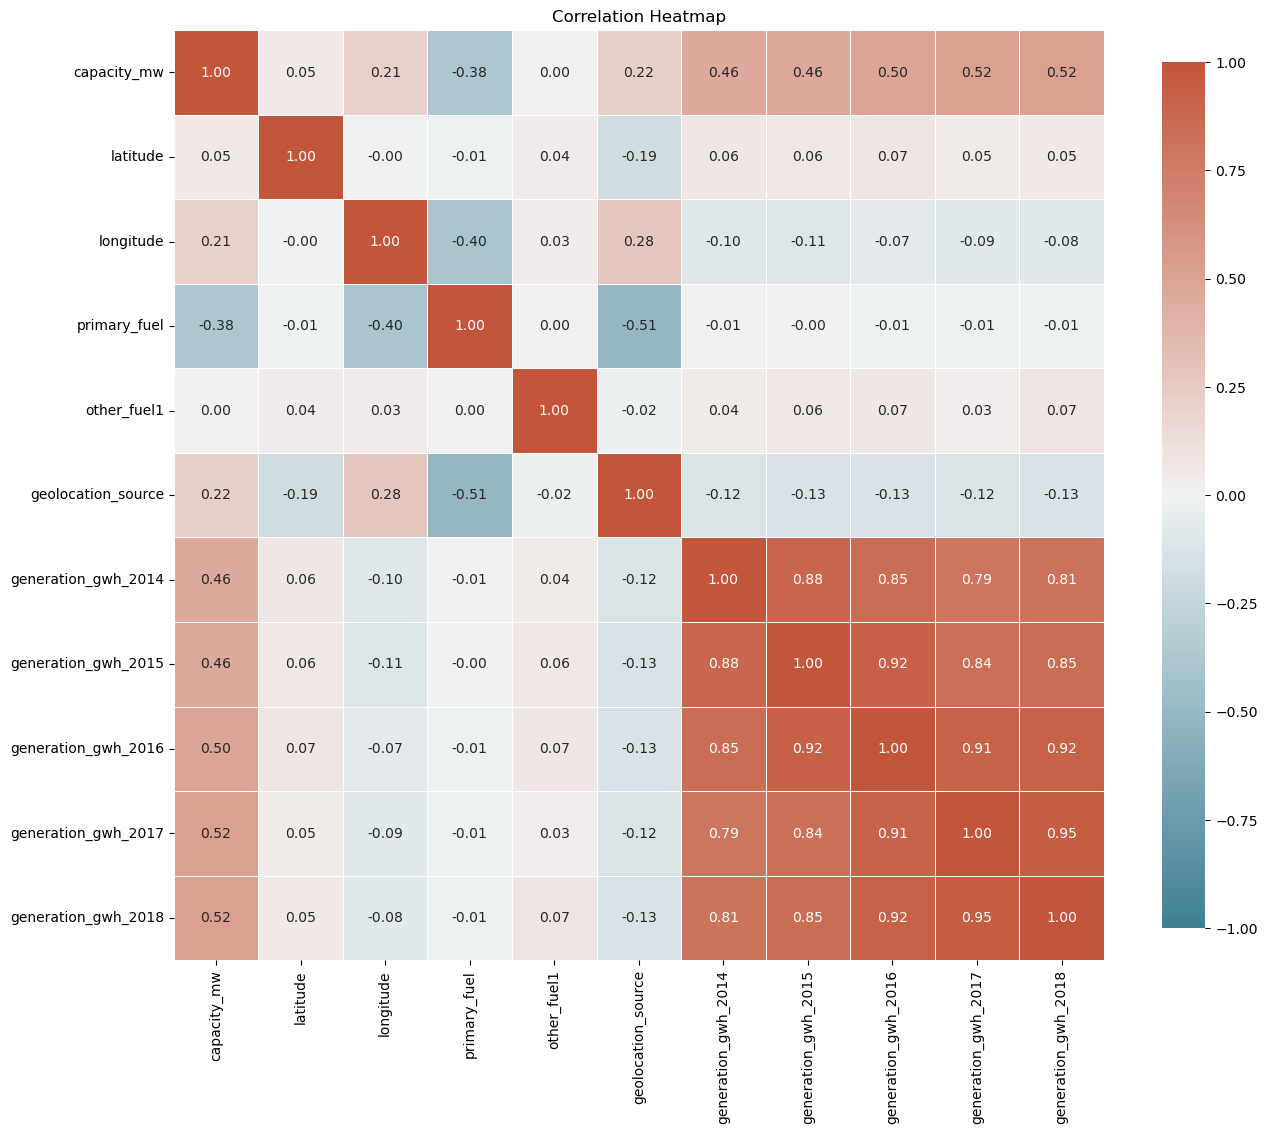

In [105]:
corr_matrix = df2.corr()
plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title("Correlation Heatmap")
plt.show()

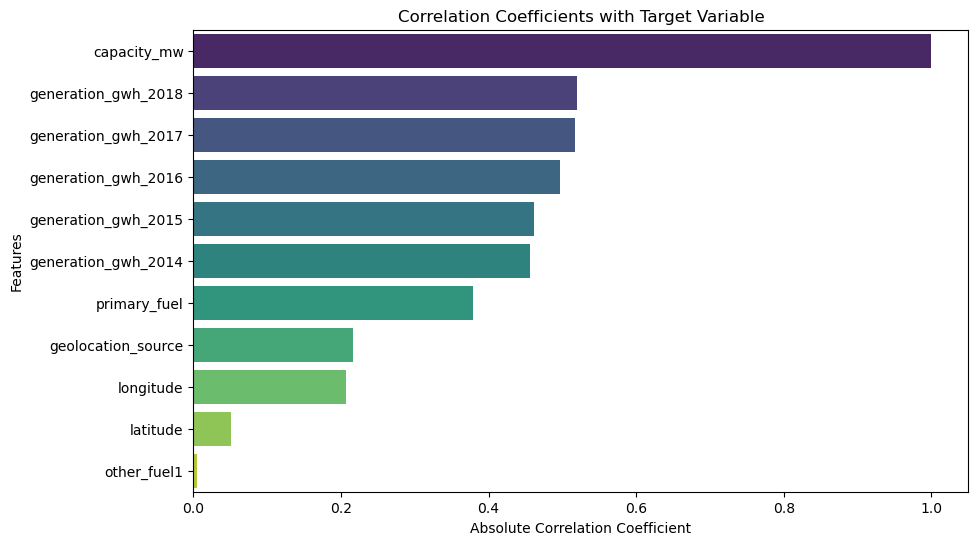

In [106]:
 # Calculating the correlation matrix
corr_matrix = df2.corr()

# Extracting correlations with the target variable
corr_with_target = corr_matrix['capacity_mw'].abs()

# Sorting the correlations in descending order
sorted_corr = corr_with_target.sort_values(ascending=False)

# Creating a bar plot to visualize the sorted correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette="viridis")
plt.title("Correlation Coefficients with Target Variable")
plt.xlabel("Absolute Correlation Coefficient")
plt.ylabel("Features")
plt.show()

other_fuel1 is not correlated with the target

In [107]:
df2.drop('other_fuel1', axis = 1, inplace = True)

In [108]:
df2['generation_gwh'] = (df2.generation_gwh_2014+df2.generation_gwh_2015+df2.generation_gwh_2016+df2.generation_gwh_2017+
                         df2.generation_gwh_2018)/5

In [109]:
df2.drop(['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',
           'generation_gwh_2018'], axis = 1, inplace = True)

In [110]:
df2

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh
gppd_idnr,,,,,,
WRI1020239,2.5,28.1839,0.158422,6.0,1.0,43.956363
WRI1019881,98.0,24.7663,0.158422,1.0,2.0,43.956363
WRI1026669,39.2,21.9038,0.158422,7.0,2.0,43.956363
IND0000001,135.0,23.8712,0.158422,2.0,2.0,27.066281
IND0000002,1800.0,21.9603,0.158422,1.0,2.0,58.798574
...,...,...,...,...,...,...
IND0000513,1600.0,16.2949,0.158422,1.0,2.0,24.008553
WRI1026222,3.0,12.8932,0.158422,6.0,0.0,43.956363
WRI1026776,25.5,15.2758,0.158422,7.0,2.0,43.956363


In [111]:
# separating features and target

x1 = df2.drop('capacity_mw', axis = 1)
y1 = df2['capacity_mw']

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


# Standardize the variables
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)

# Calculate VIF for each standardized variable
vif = pd.DataFrame()
vif["Variable"] = x1.columns
vif["VIF"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]

# Display the DataFrame with VIF values for standardized variables
print(vif)

             Variable       VIF
0            latitude  1.052607
1           longitude  1.211100
2        primary_fuel  1.388424
3  geolocation_source  1.459511
4      generation_gwh  1.026786


# Modelling

In [113]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn .metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

In [114]:
max_accu = 0
max_rs = 0

for i in range(1, 200):
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=i)
    
    lr_model = LinearRegression()
    lr_model.fit(x1_train, y1_train)
    
    pred = lr_model.predict(x1_test)
    
    current_accu = r2_score(y1_test, pred)
    
    if current_accu > max_accu:
        max_accu = current_accu
        max_rs = i

print('Max R2 score is:', max_accu, 'at Random_state:', max_rs)

Max R2 score is: 0.5443827242315222 at Random_state: 39


In [115]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=39)

In [116]:
# training the data on each algorithm and CV

L = LinearRegression()
R = RandomForestRegressor()
G = GradientBoostingRegressor()
D = DecisionTreeRegressor()
K = KNN()
l = Lasso()


Mod = [L,R,G,D,K,l]

for model in Mod:
    model.fit(x1_train,y1_train)
    pred_model = model.predict(x1_test)
    score = cross_val_score(model,x1,y1, cv = 7, scoring = 'r2')
    print('R2_score training data: ', r2_score(y1_train, model.predict(x1_train)))
    print('R2_score: ', r2_score(y1_test, pred_model))
    print('Mean absolute error: ', mean_absolute_error(y1_test, pred_model))
    print('Mean squared error: ', mean_squared_error(y1_test, pred_model))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y1_test, pred_model)))
    print(score)
    print(score.mean())
    print('The difference between R2 score and cross validation score for ', model, 'is: ', (r2_score(y1_test, pred_model) - score.mean()))
    print('\n')

R2_score training data:  0.3450822623948503
R2_score:  0.5443827242315222
Mean absolute error:  346.07597251896453
Mean squared error:  233727.66564611794
Root mean squared error:  483.4538919546702
[ 0.34864995 -0.14087018  0.1357626   0.4078507   0.28036792  0.56451491
  0.50392156]
0.3000282095188657
The difference between R2 score and cross validation score for  LinearRegression() is:  0.2443545147126565


R2_score training data:  0.9661069251607366
R2_score:  0.8474510523058187
Mean absolute error:  135.67789967592591
Mean squared error:  78256.27195806944
Root mean squared error:  279.7432250440919
[0.82886566 0.76375971 0.74888569 0.78207012 0.61649809 0.83945453
 0.83981269]
0.7741923564382235
The difference between R2 score and cross validation score for  RandomForestRegressor() is:  0.07325869586759526


R2_score training data:  0.9197287138986341
R2_score:  0.8620343845261018
Mean absolute error:  125.0183871324445
Mean squared error:  70775.15045880347
Root mean squared err

- LinearRegression() and Lasso() are not good models for predicting 'capacity_mw', because the poorly performed on train data
- KNeighborsRegressor() has the least overfiting problem, as the difference between cross-val-score and r2-score is the least. But it has greater MAE and lower training score than RandomForestRegressor() and GradientBoostingRegressor()
- RandomForestRegressor() has a lower overfitting problem than  GradientBoostingRegressor().


- Based on the above, we select RandomForestRegressor() as our best model

In [121]:
# hypertuning

from sklearn.model_selection import GridSearchCV

param = { 'min_impurity_decrease':[0,0.1,0.3],
         'n_estimators':[50,100],
        'random_state':[2,5,10],
         'criterion':['friedman_mse', 'squared_error'],
         'n_jobs':[-1,0,1]
        }

GV = GridSearchCV(RandomForestRegressor(), param, cv=5)
GV.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'min_impurity_decrease': [0, 0.1, 0.3],
                         'n_estimators': [50, 100], 'n_jobs': [-1, 0, 1],
                         'random_state': [2, 5, 10]})

In [122]:
GV.best_params_

{'criterion': 'squared_error',
 'min_impurity_decrease': 0.3,
 'n_estimators': 50,
 'n_jobs': -1,
 'random_state': 5}

In [123]:
model2 = RandomForestRegressor(criterion = 'squared_error', min_impurity_decrease = 0.3, n_estimators = 50, n_jobs = -1, 
random_state= 5)
model2.fit(x1_train, y1_train)
pred = model2.predict(x1_test)
print('R2_score: ', r2_score(y1_test, pred)*100)
print('Mean absolute error: ', mean_absolute_error(y1_test, pred))
print('Mean squared error: ', mean_squared_error(y1_test, pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y1_test, pred)))

R2_score:  85.50883557297321
Mean absolute error:  129.5531706154952
Mean squared error:  74338.40229851459
Root mean squared error:  272.65069649372725


In [124]:
import pickle

pickle.dump(model2, open('reg_power_Romuald.pkl', 'wb'))